## 1. Import

In [15]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [33]:
car = pd.read_csv('training.csv')
target = car['IsBadBuy']
bias = target.sum() / target.count()
print('Be careful with bias, (1 - IsBadBuy) = {:.4f}%'.format(100 * (1-bias)))
car.columns

Be careful with bias, (1 - IsBadBuy) = 87.7012%


Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

## 2. Features

In [86]:
def prob_bad(data, label, plot=True):
    bias = car['IsBadBuy'].sum() / car['IsBadBuy'].count()
    counter = Counter(data[label])
    N = len(counter)
    # Return a dictionary and a map
    isbad = {key:[0.0, 0, value] for key, value in counter.items()}
    label_map = {}
    # For plotting
    xplot = [0]*N
    yplot = [0]*N
    
    for idx, key in enumerate(isbad):
        isbad[key][1] = sum(data['IsBadBuy'][data[label] == key])
        isbad[key][0] = isbad[key][1] / isbad[key][2]
        
        label_map[key] = idx
        xplot[idx] = idx
        yplot[idx] = isbad[key][0]
        
    if plot:
        plt.figure()
        plt.plot(xplot, yplot)
        plt.plot(xplot, [bias] * N)
        plt.title(label)
    
    return isbad, label_map

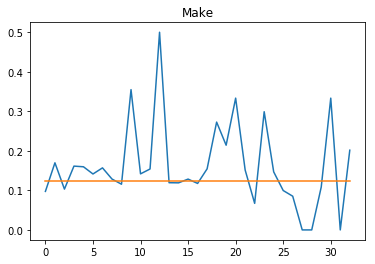

In [31]:
isbad, label_map = prob_bad(car, 'Make')

'Color' don't make any difference, spikes are either NaN or NOT AVAIL

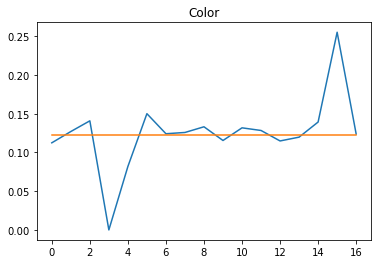

In [39]:
isbad, label_map = prob_bad(car, 'Color')

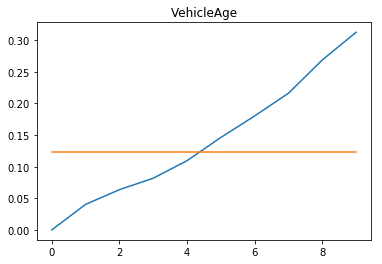

In [34]:
isbad, label_map = prob_bad(car, 'VehicleAge')

'VNST' be careful with states that don't have many data points.

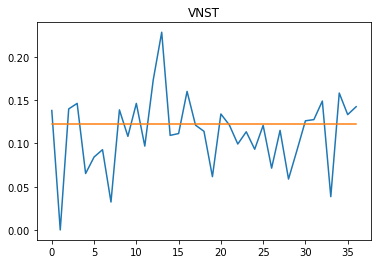

In [46]:
isbad, label_map = prob_bad(car, 'VNST')

'VNZIP1' expand this by state 'VNST', at least for interesting states like 'AR'

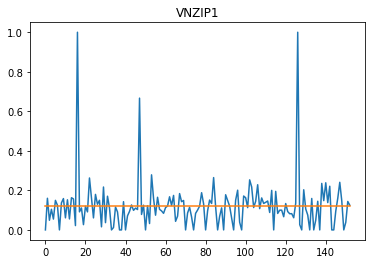

In [55]:
isbad, label_map = prob_bad(car, 'VNZIP1')

{nan: [0.0, 0, 3174],
 'Alloy': [0.11054091539528432, 3985, 36050],
 'Covers': [0.08044479457035511, 2655, 33004],
 'Special': [0.13112582781456952, 99, 755]}

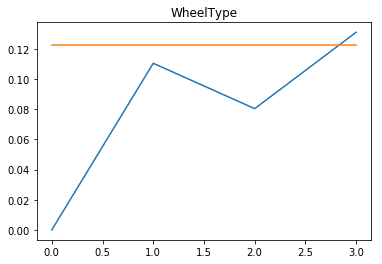

In [58]:
isbad, label_map = prob_bad(car, 'WheelType')
isbad

{nan: [0.0, 0, 5],
 'TOP LINE ASIAN': [0.13460505104782375, 501, 3722],
 'OTHER': [0.13846153846153847, 27, 195],
 'AMERICAN': [0.12104280002621748, 7387, 61028],
 'OTHER ASIAN': [0.13208016930163077, 1061, 8033]}

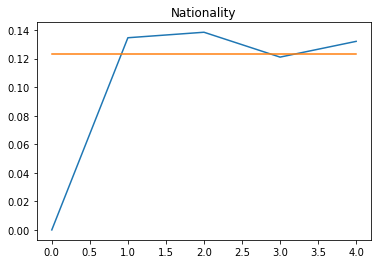

In [59]:
isbad, label_map = prob_bad(car, 'Nationality')
isbad

{'ADESA': [0.15188032412216912, 2193, 14439],
 'MANHEIM': [0.1148795166045367, 4715, 41043],
 'OTHER': [0.11816467630421119, 2068, 17501]}

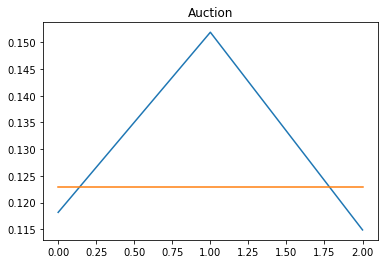

In [60]:
isbad, label_map = prob_bad(car, 'Auction')
isbad

In [94]:
car['PurchYear'] = car['PurchDate'].apply(lambda x: int(x.split('/')[2]))
car['PurchMonth'] = car['PurchDate'].apply(lambda x: int(x.split('/')[0]))
car['PurchDay'] = car['PurchDate'].apply(lambda x: int(x.split('/')[1]))
car['PurchIonut'] = car['PurchDate'].apply(lambda x: x.split('/')[2] + str(int(x.split('/')[0])).zfill(2) )

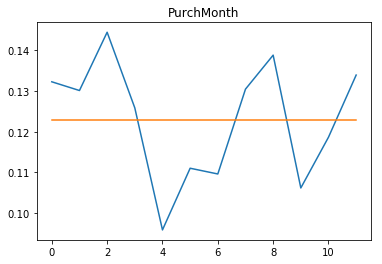

In [91]:
isbad, label_map = prob_bad(car, 'PurchMonth')

{'200901': [0.124282982791587, 260, 2092],
 '200902': [0.12181069958847737, 444, 3645],
 '200903': [0.13027704485488126, 395, 3032],
 '200904': [0.10511945392491467, 308, 2930],
 '200905': [0.076234928043562813, 196, 2571],
 '200906': [0.1007137192704203, 254, 2522],
 '200907': [0.11592076302274394, 316, 2726],
 '200908': [0.12159329140461216, 406, 3339],
 '200909': [0.13609982588508415, 469, 3446],
 '200910': [0.11025943396226415, 374, 3392],
 '200911': [0.115356355620867, 314, 2722],
 '200912': [0.11686838124054463, 309, 2644],
 '201001': [0.1385362210604929, 371, 2678],
 '201002': [0.13963681903569192, 446, 3194],
 '201003': [0.15782945736434109, 509, 3225],
 '201004': [0.14608985024958401, 439, 3005],
 '201005': [0.11163374098463469, 356, 3189],
 '201006': [0.11925150650174438, 376, 3153],
 '201007': [0.10412698412698412, 328, 3150],
 '201008': [0.14107142857142857, 395, 2800],
 '201009': [0.14192495921696574, 435, 3065],
 '201010': [0.10248283148441627, 388, 3786],
 '201011': [0.1

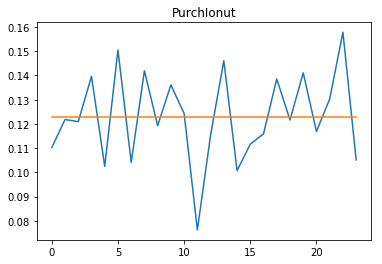

In [95]:
isbad, label_map = prob_bad(car, 'PurchIonut')
isbad

C:\Users\tolar\Documents\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


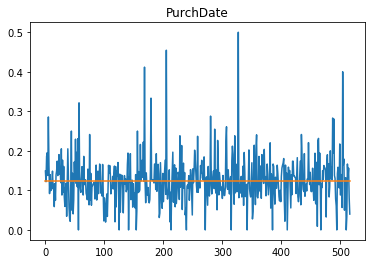

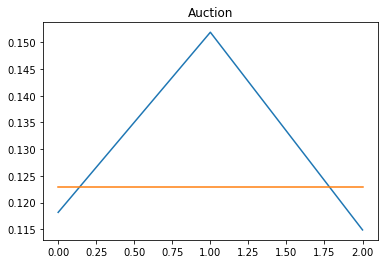

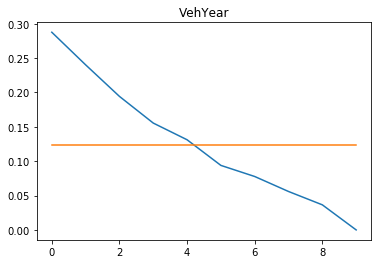

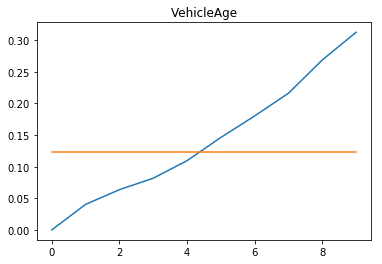

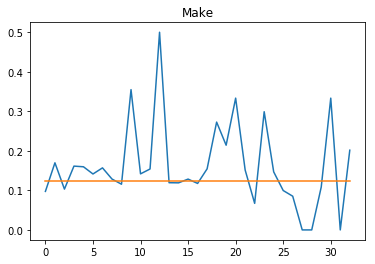

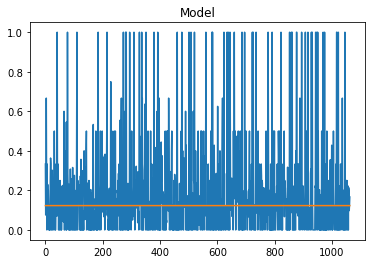

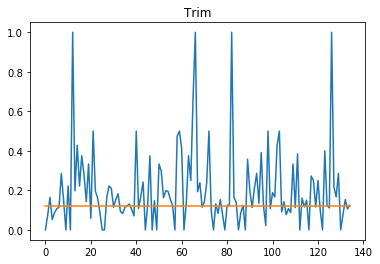

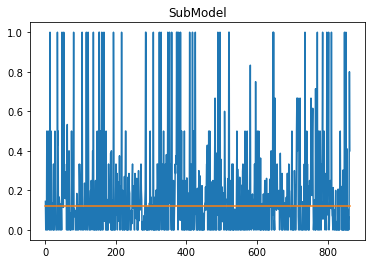

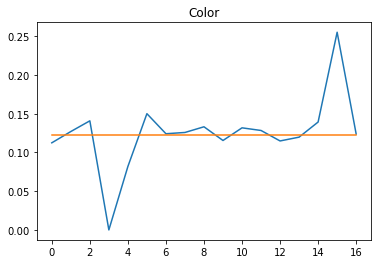

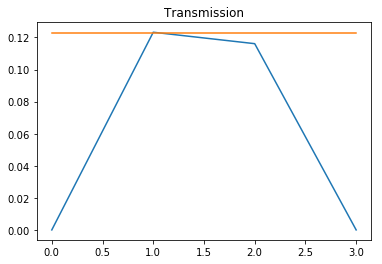

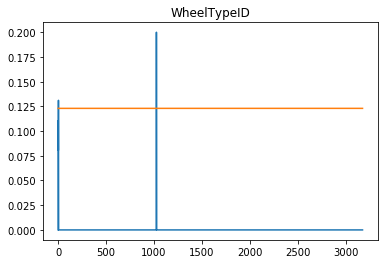

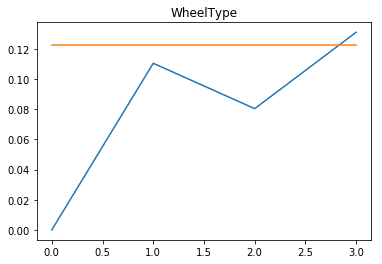

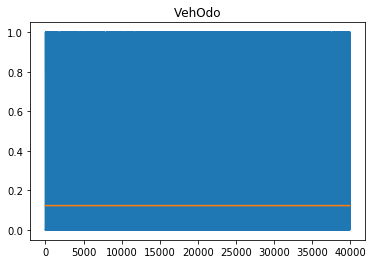

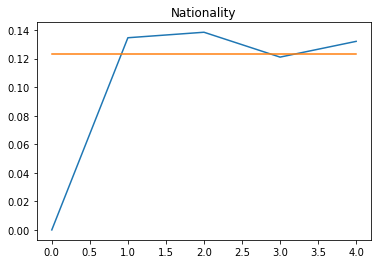

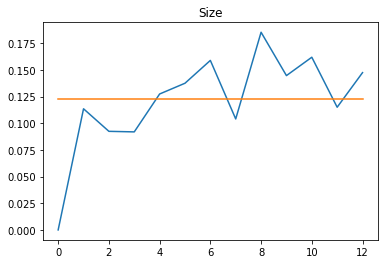

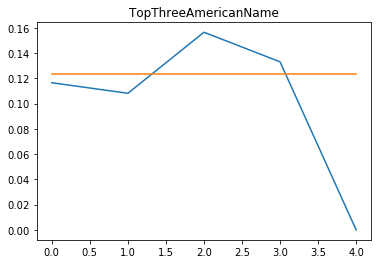

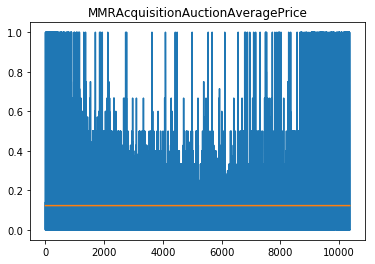

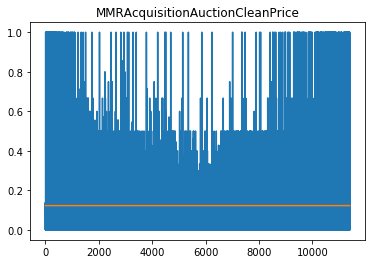

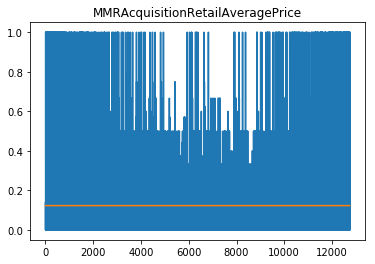

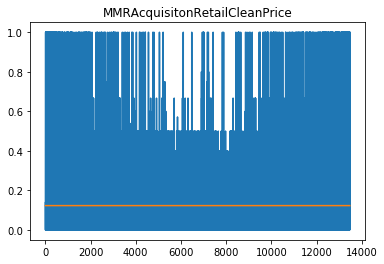

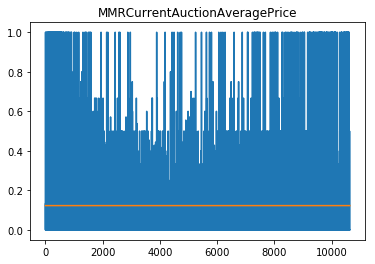

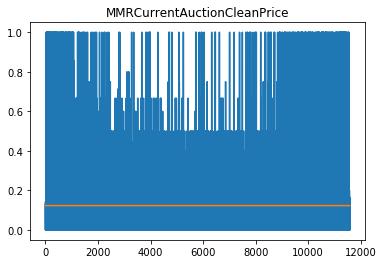

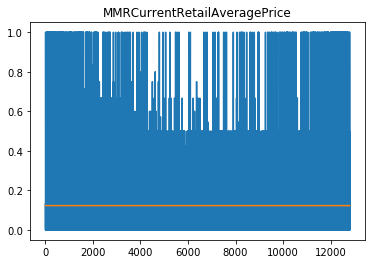

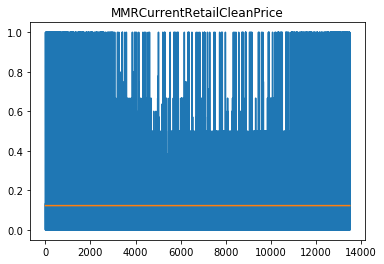

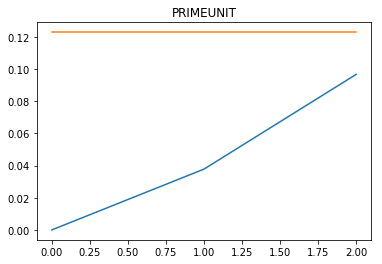

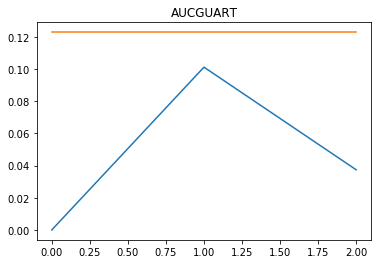

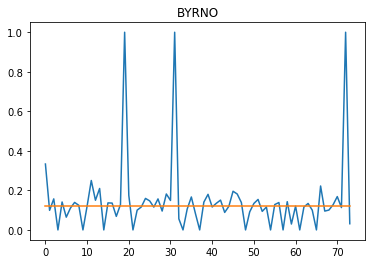

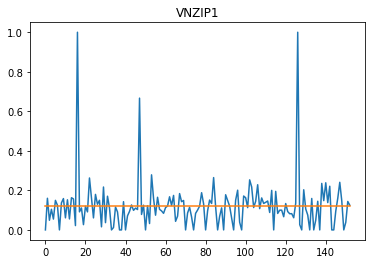

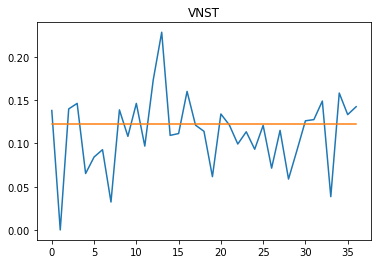

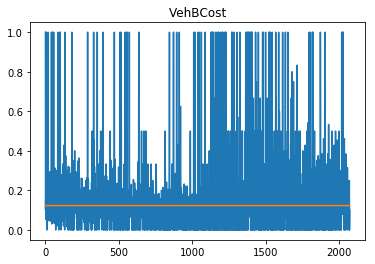

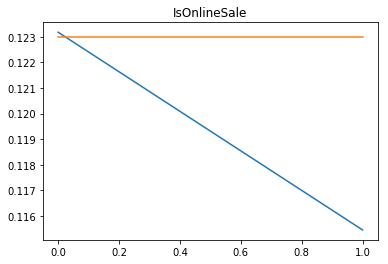

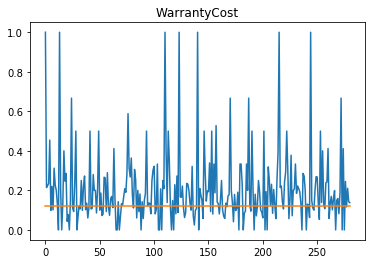

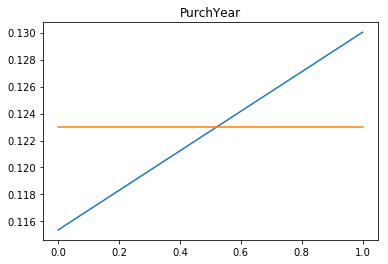

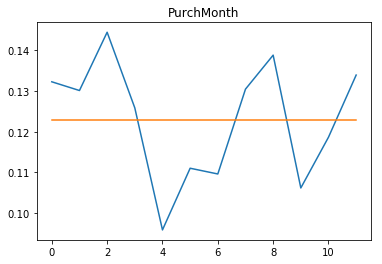

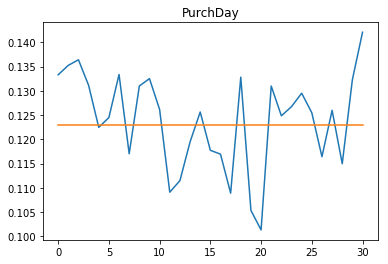

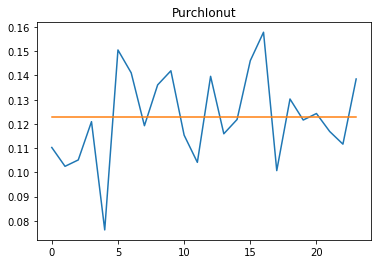

In [88]:
for label in car.columns[2:]:
    isbad, label_map = prob_bad(car, label)

### Relevant features
Review **prob_bad** function to count correctly NaN

(Relevance 1: good 3: bad)

- (2) PurchDate: check year and month
- (2) Auction = 'ADESA'
- (1) VehicleYear == VehicleAge\*
- (2) Make: check the best ones and the worst ones
- (2) Model: try to combine maker and model (probability)
- (2) Trim: Same as model
- (3) SubModel: same as model
- (-) Color: no relevance
- (3) Transmission: Manual is slighly better
- (2) WheelTypeID == WheelType\* : 'Special' seems slightly bad
- (1) VehOdo: check correlation with the VehicleAge
- (-) Nationality: Country of the Make, check if 1-1
- (1) Size: SUV are bad, sports shame on you
- (1) TopThreeAmericanName: group of Make
- (?) MMR : continuous data
- (2) PRIMEUNIT: if filled seems better
- (2) AUCGUART: GREEN is good
- (?) BYRNO: goes hand in hand with Auction?
- (2) VNZIP1 in combination with VNST
- (1) VNST: check inside ZIP codes how it behaves
- (?) VehBCost: continuous
- (3) IsOnlineSale: online is sliiiiigghtly better
- (?) WarrantyCost: continuous